# Batch Gradient Descent

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

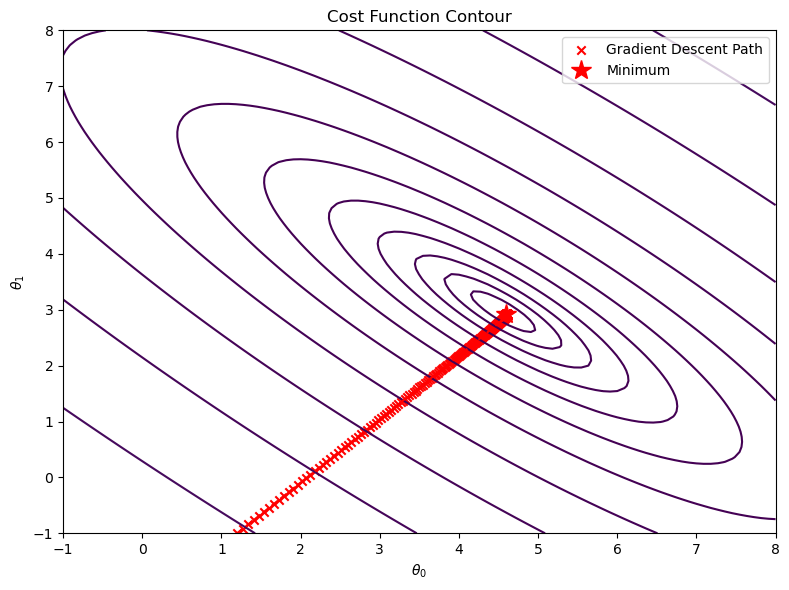

In [35]:
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.rand(100,1)

def compute_cost(x,y,theta):
    m=len(y)
    predictions=x.dot(theta)
    cost=(1/(2*m))*np.sum(np.square(predictions-y))
    return cost

def gradient_descent(x,y,theta,learning_rate,num_iterations):
    m=len(y)
    cost_history=np.zeros(num_iterations)
    theta_history=np.zeros((num_iterations,2))

    for iter in range(num_iterations):
        prediction=np.dot(x,theta)
        theta=theta-(1/m)*learning_rate*(x.T.dot((prediction-y)))
        theta_history[iter,:]=theta.T
        cost_history[iter]=compute_cost(x,y,theta)
    return theta,cost_history,theta_history

x_b=np.c_[np.ones((len(x),1)),x]

theta_initial=np.random.randn(2,1)
learning_rate=0.01
num_iterations=500

theta_best, cost_history, theta_history=gradient_descent(x_b,y,theta_initial, learning_rate, num_iterations)

theta0_vals=np.linspace(-1,8,100)
theta1_vals=np.linspace(-1,8,100)
theta0_mesh,theta1_mesh=np.meshgrid(theta0_vals,theta1_vals)
cost_mesh=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta=np.array([[theta0_vals[i]],[theta1_vals[j]]])
        cost_mesh[i,j]=compute_cost(x_b,y,theta)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.contour(theta0_mesh,theta1_mesh,cost_mesh.T,levels=np.logspace(-2,3,20),cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Cost Function Contour')

ax.scatter(theta_history[:,0],theta_history[:,1],c='r',marker='x',label='Gradient Descent Path')
ax.plot(theta_history[:,0],theta_history[:,1],'r--')
ax.plot(theta_best[0],theta_best[1],'r*',markersize=15,label='Minimum')
ax.legend()

plt.tight_layout()
plt.show()

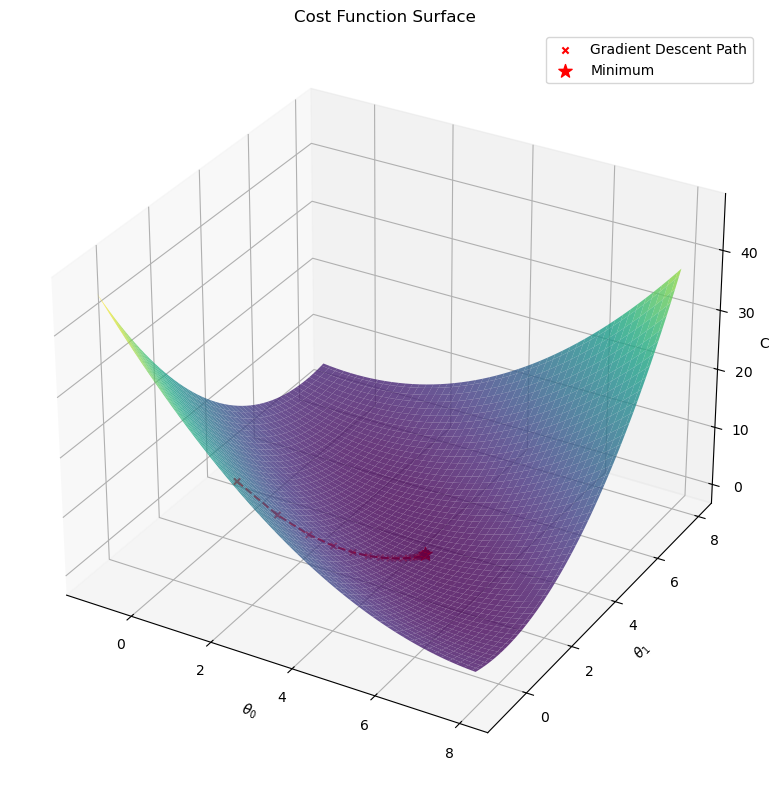

In [33]:
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.rand(100,1)

def compute_cost(x,y,theta):
    m=len(y)
    predictions=x.dot(theta)
    cost=(1/(2*m))*np.sum(np.square(predictions-y))
    return cost

def gradient_descent(x,y,theta,learning_rate,num_iterations):
    m=len(y)
    cost_history=np.zeros(num_iterations)
    theta_history=np.zeros((num_iterations,2))

    for iter in range(num_iterations):
        prediction=np.dot(x,theta)
        theta=theta-(1/m)*learning_rate*(x.T.dot((prediction-y)))
        theta_history[iter,:]=theta.T
        cost_history[iter]=compute_cost(x,y,theta)
    return theta,cost_history,theta_history

x_b=np.c_[np.ones((len(x),1)),x]

theta_initial=np.random.randn(2,1)
learning_rate=0.1
num_iterations=100

theta_best, cost_history, theta_history=gradient_descent(x_b,y,theta_initial, learning_rate, num_iterations)

theta0_vals=np.linspace(-1,8,100)
theta1_vals=np.linspace(-1,8,100)
theta0_mesh,theta1_mesh=np.meshgrid(theta0_vals,theta1_vals)
cost_mesh=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta=np.array([[theta0_vals[i]],[theta1_vals[j]]])
        cost_mesh[i,j]=compute_cost(x_b,y,theta)

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
surf=ax.plot_surface(theta0_mesh,theta1_mesh,cost_mesh.T,cmap='viridis',alpha=0.8)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')

ax.scatter(theta_history[:,0],theta_history[:,1],cost_history,c='r',marker='x',label='Gradient Descent Path')
ax.plot(theta_history[:,0],theta_history[:,1],cost_history ,'r--')
ax.scatter(theta_best[0],theta_best[1], compute_cost(x_b,y,theta_best),color='r',marker='*',s=100,label='Minimum')
ax.legend()

plt.tight_layout()
plt.show()

# Stochastic Gradient Descent

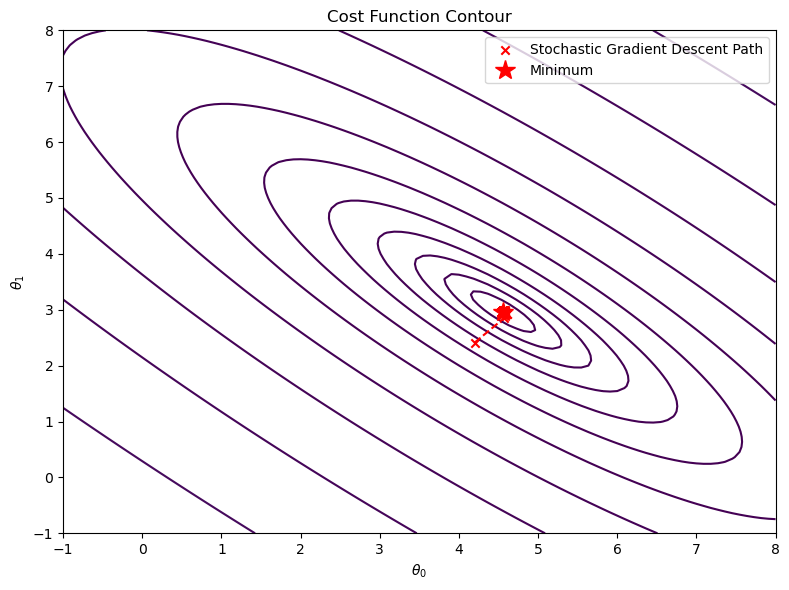

In [38]:
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.rand(100,1)

def compute_cost(x,y,theta):
    m=len(y)
    predictions=x.dot(theta)
    cost=(1/(2*m))*np.sum(np.square(predictions-y))
    return cost

def stochastic_gradient_descent(x,y,theta,learning_rate,num_iterations,batch_size=1):
    m=len(y)
    cost_history=np.zeros(num_iterations)
    theta_history=np.zeros((num_iterations,2))

    for iter in range(num_iterations):
        cost=0.0
        indices=np.random.permutation(m)
        x_shuffled=x[indices]
        y_shuffled=y[indices]

        for i in range(0,m,batch_size):
            x_batch=x_shuffled[i:i+batch_size]
            y_batch=y_shuffled[i:i+batch_size]
            m_batch=len(y_batch)
            prediction=np.dot(x_batch,theta)
            theta = theta - (1 / m_batch) * learning_rate * (x_batch.T.dot((prediction - y_batch)))
            cost += compute_cost(x_batch, y_batch, theta)

        cost_history[iter]=cost/(m//batch_size)
        theta_history[iter,:]=theta.T

    return theta,cost_history,theta_history

x_b=np.c_[np.ones((len(x),1)),x]

theta_initial=np.random.randn(2,1)
learning_rate=0.01
num_iterations=500
batch_size=1

theta_best, cost_history, theta_history=stochastic_gradient_descent(x_b,y,theta_initial, learning_rate, num_iterations,batch_size)

theta0_vals=np.linspace(-1,8,100)
theta1_vals=np.linspace(-1,8,100)
theta0_mesh,theta1_mesh=np.meshgrid(theta0_vals,theta1_vals)
cost_mesh=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta=np.array([[theta0_vals[i]],[theta1_vals[j]]])
        cost_mesh[i,j]=compute_cost(x_b,y,theta)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.contour(theta0_mesh,theta1_mesh,cost_mesh.T,levels=np.logspace(-2,3,20),cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Cost Function Contour')

ax.scatter(theta_history[:,0],theta_history[:,1],c='r',marker='x',label='Stochastic Gradient Descent Path')
ax.plot(theta_history[:,0],theta_history[:,1],'r--')
ax.plot(theta_best[0],theta_best[1],'r*',markersize=15,label='Minimum')
ax.legend()

plt.tight_layout()
plt.show()

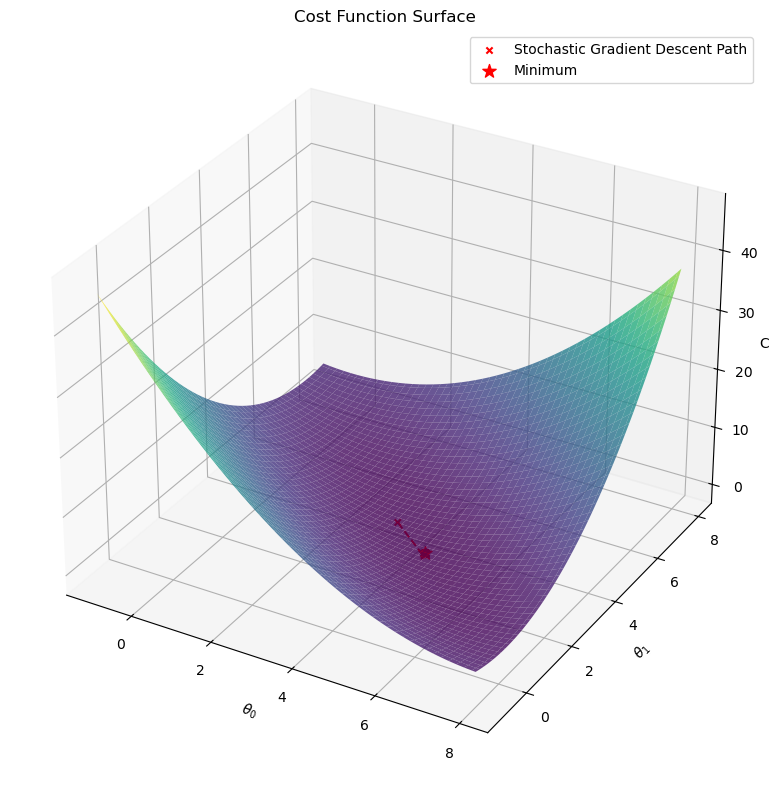

In [39]:
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.rand(100,1)

def compute_cost(x,y,theta):
    m=len(y)
    predictions=x.dot(theta)
    cost=(1/(2*m))*np.sum(np.square(predictions-y))
    return cost

def stochastic_gradient_descent(x,y,theta,learning_rate,num_iterations,batch_size=1):
    m=len(y)
    cost_history=np.zeros(num_iterations)
    theta_history=np.zeros((num_iterations,2))

    for iter in range(num_iterations):
        cost=0.0
        indices=np.random.permutation(m)
        x_shuffled=x[indices]
        y_shuffled=y[indices]

        for i in range(0,m,batch_size):
            x_batch=x_shuffled[i:i+batch_size]
            y_batch=y_shuffled[i:i+batch_size]
            m_batch=len(y_batch)
            prediction=np.dot(x_batch,theta)
            theta = theta - (1 / m_batch) * learning_rate * (x_batch.T.dot((prediction - y_batch)))
            cost += compute_cost(x_batch, y_batch, theta)

        cost_history[iter]=cost/(m//batch_size)
        theta_history[iter,:]=theta.T

    return theta,cost_history,theta_history

x_b=np.c_[np.ones((len(x),1)),x]

theta_initial=np.random.randn(2,1)
learning_rate=0.01
num_iterations=500
batch_size=1

theta_best, cost_history, theta_history=stochastic_gradient_descent(x_b,y,theta_initial, learning_rate, num_iterations,batch_size)

theta0_vals=np.linspace(-1,8,100)
theta1_vals=np.linspace(-1,8,100)
theta0_mesh,theta1_mesh=np.meshgrid(theta0_vals,theta1_vals)
cost_mesh=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta=np.array([[theta0_vals[i]],[theta1_vals[j]]])
        cost_mesh[i,j]=compute_cost(x_b,y,theta)

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
surf=ax.plot_surface(theta0_mesh,theta1_mesh,cost_mesh.T,cmap='viridis',alpha=0.8)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')

ax.scatter(theta_history[:,0],theta_history[:,1],cost_history,c='r',marker='x',label='Stochastic Gradient Descent Path')
ax.plot(theta_history[:,0],theta_history[:,1],cost_history ,'r--')
ax.scatter(theta_best[0],theta_best[1], compute_cost(x_b,y,theta_best),color='r',marker='*',s=100,label='Minimum')
ax.legend()

plt.tight_layout()
plt.show()

# Mini Batch Gradient Descent

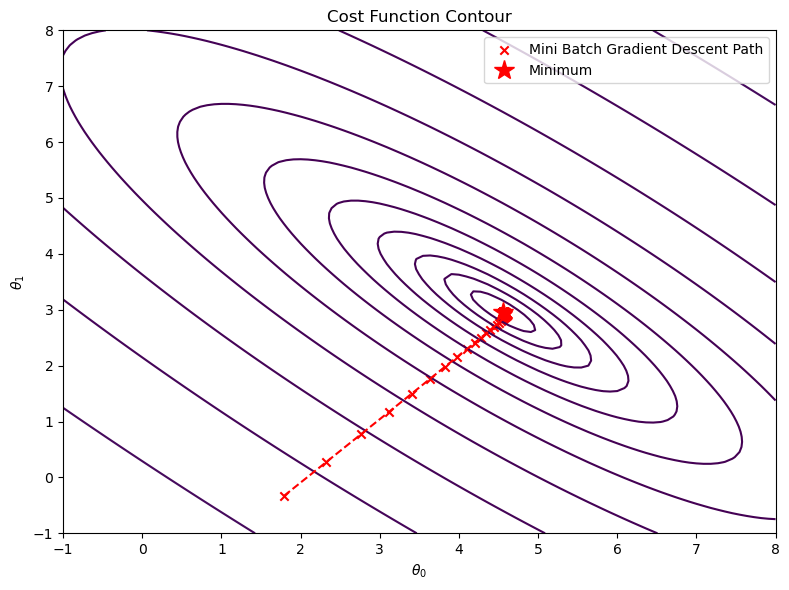

In [41]:
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.rand(100,1)

def compute_cost(x,y,theta):
    m=len(y)
    predictions=x.dot(theta)
    cost=(1/(2*m))*np.sum(np.square(predictions-y))
    return cost

def mini_batch_gradient_descent(x,y,theta,learning_rate,num_iterations,batch_size=1):
    m=len(y)
    cost_history=np.zeros(num_iterations)
    theta_history=np.zeros((num_iterations,2))

    for iter in range(num_iterations):
        cost=0.0
        indices=np.random.permutation(m)
        x_shuffled=x[indices]
        y_shuffled=y[indices]

        for i in range(0,m,batch_size):
            x_batch=x_shuffled[i:i+batch_size]
            y_batch=y_shuffled[i:i+batch_size]
            m_batch=len(y_batch)
            prediction=np.dot(x_batch,theta)
            theta = theta - (1 / m_batch) * learning_rate * (x_batch.T.dot((prediction - y_batch)))
            cost += compute_cost(x_batch, y_batch, theta)

        cost_history[iter]=cost/(m//batch_size)
        theta_history[iter,:]=theta.T

    return theta,cost_history,theta_history

x_b=np.c_[np.ones((len(x),1)),x]

theta_initial=np.random.randn(2,1)
learning_rate=0.01
num_iterations=500
batch_size=10

theta_best, cost_history, theta_history=mini_batch_gradient_descent(x_b,y,theta_initial, learning_rate, num_iterations,batch_size)

theta0_vals=np.linspace(-1,8,100)
theta1_vals=np.linspace(-1,8,100)
theta0_mesh,theta1_mesh=np.meshgrid(theta0_vals,theta1_vals)
cost_mesh=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta=np.array([[theta0_vals[i]],[theta1_vals[j]]])
        cost_mesh[i,j]=compute_cost(x_b,y,theta)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.contour(theta0_mesh,theta1_mesh,cost_mesh.T,levels=np.logspace(-2,3,20),cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Cost Function Contour')

ax.scatter(theta_history[:,0],theta_history[:,1],c='r',marker='x',label='Mini Batch Gradient Descent Path')
ax.plot(theta_history[:,0],theta_history[:,1],'r--')
ax.plot(theta_best[0],theta_best[1],'r*',markersize=15,label='Minimum')
ax.legend()

plt.tight_layout()
plt.show()

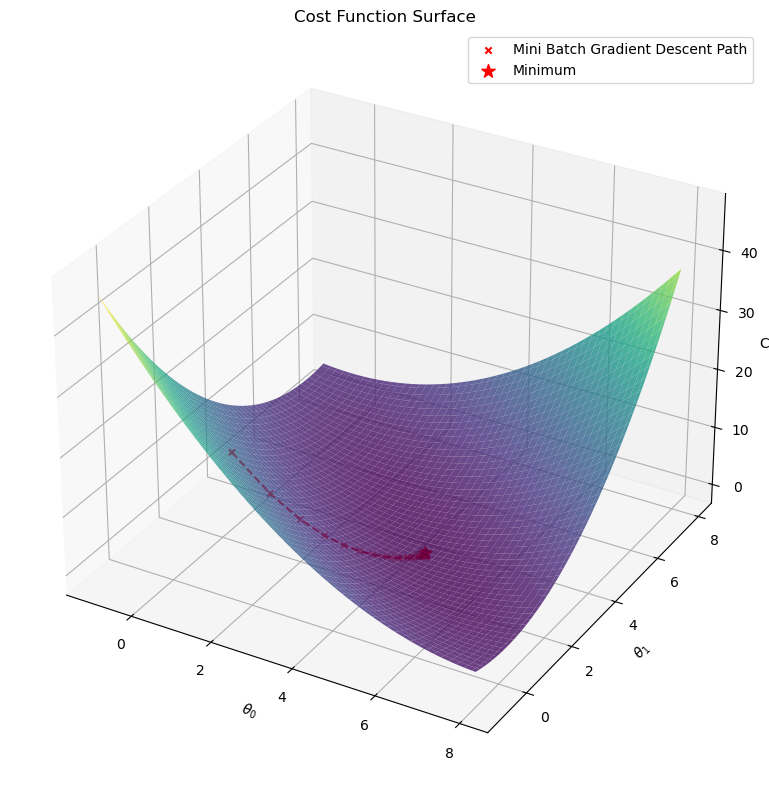

In [42]:
np.random.seed(0)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.rand(100,1)

def compute_cost(x,y,theta):
    m=len(y)
    predictions=x.dot(theta)
    cost=(1/(2*m))*np.sum(np.square(predictions-y))
    return cost

def mini_batch_gradient_descent(x,y,theta,learning_rate,num_iterations,batch_size=1):
    m=len(y)
    cost_history=np.zeros(num_iterations)
    theta_history=np.zeros((num_iterations,2))

    for iter in range(num_iterations):
        cost=0.0
        indices=np.random.permutation(m)
        x_shuffled=x[indices]
        y_shuffled=y[indices]

        for i in range(0,m,batch_size):
            x_batch=x_shuffled[i:i+batch_size]
            y_batch=y_shuffled[i:i+batch_size]
            m_batch=len(y_batch)
            prediction=np.dot(x_batch,theta)
            theta = theta - (1 / m_batch) * learning_rate * (x_batch.T.dot((prediction - y_batch)))
            cost += compute_cost(x_batch, y_batch, theta)

        cost_history[iter]=cost/(m//batch_size)
        theta_history[iter,:]=theta.T

    return theta,cost_history,theta_history

x_b=np.c_[np.ones((len(x),1)),x]

theta_initial=np.random.randn(2,1)
learning_rate=0.01
num_iterations=500
batch_size=10

theta_best, cost_history, theta_history=mini_batch_gradient_descent(x_b,y,theta_initial, learning_rate, num_iterations,batch_size)

theta0_vals=np.linspace(-1,8,100)
theta1_vals=np.linspace(-1,8,100)
theta0_mesh,theta1_mesh=np.meshgrid(theta0_vals,theta1_vals)
cost_mesh=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta=np.array([[theta0_vals[i]],[theta1_vals[j]]])
        cost_mesh[i,j]=compute_cost(x_b,y,theta)

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
surf=ax.plot_surface(theta0_mesh,theta1_mesh,cost_mesh.T,cmap='viridis',alpha=0.8)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')

ax.scatter(theta_history[:,0],theta_history[:,1],cost_history,c='r',marker='x',label='Mini Batch Gradient Descent Path')
ax.plot(theta_history[:,0],theta_history[:,1],cost_history ,'r--')
ax.scatter(theta_best[0],theta_best[1], compute_cost(x_b,y,theta_best),color='r',marker='*',s=100,label='Minimum')
ax.legend()

plt.tight_layout()
plt.show()